In [2]:
import pandas as pd
from matplotlib import pylab as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
import sklearn.linear_model as linear_model
import sklearn.metrics as metrics
import numpy as np
from IPython.display import *
%matplotlib inline

In [3]:
np.random.seed(123)
tbl_wines = pd.read_csv('data/winequality-red.csv', sep=';')
tbl_train, tbl_test = train_test_split(tbl_wines, test_size=0.2)
y_var = 'quality'
x_vars = [c for c in tbl_wines.columns if c != y_var]

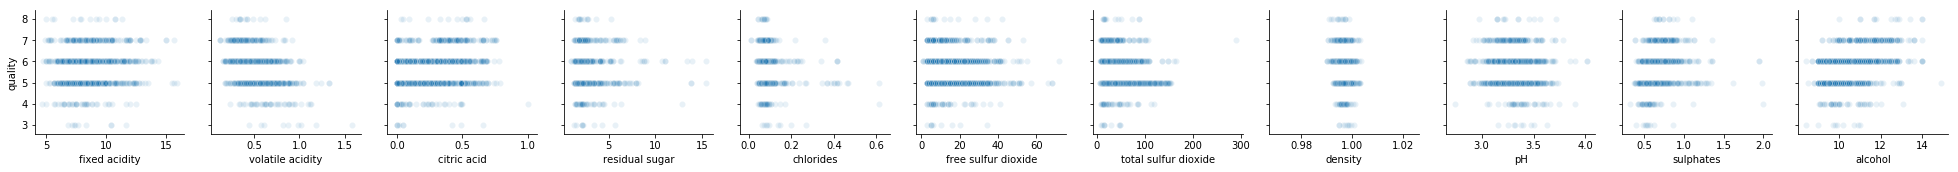

In [4]:
sns.pairplot(tbl_train, x_vars=x_vars, y_vars=[y_var], plot_kws={'alpha': 0.1})

In [5]:
model_all = linear_model.LinearRegression()
model_all.fit(tbl_train[x_vars], tbl_train[y_var])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [6]:
observations = tbl_test[y_var]
predictions = model_all.predict(tbl_test[x_vars])
r2 = metrics.r2_score(observations, predictions)

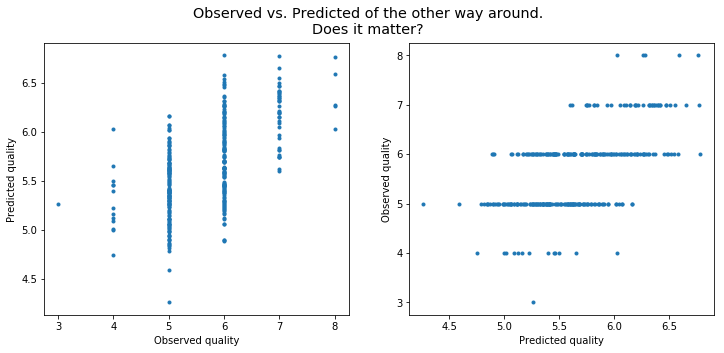

In [7]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

axes[0].plot(observations, predictions, '.')
axes[0].set_xlabel('Observed quality')
axes[0].set_ylabel('Predicted quality')

axes[1].plot(predictions, observations, '.')
axes[1].set_ylabel('Observed quality')
axes[1].set_xlabel('Predicted quality')

fig.suptitle('Observed vs. Predicted of the other way around.\nDoes it matter?', fontsize='x-large');

In [8]:
IFrame('https://doi.org/10.1016/j.ecolmodel.2008.05.006', width="90%", height='500')

## What is $R^2$?

*  the proportion of the variance in the dependent variable that is predictable from the independent variable

In [9]:
N = 100
np.random.seed(112233)
obs = np.random.randn(N) 
pred1 = obs  + np.random.randn(N) * 0.4
pred2 = obs * 2 + np.random.randn(N) * 0.4
pred3 = obs + 0.075* obs ** 2 + np.random.randn(N) * 0.1;

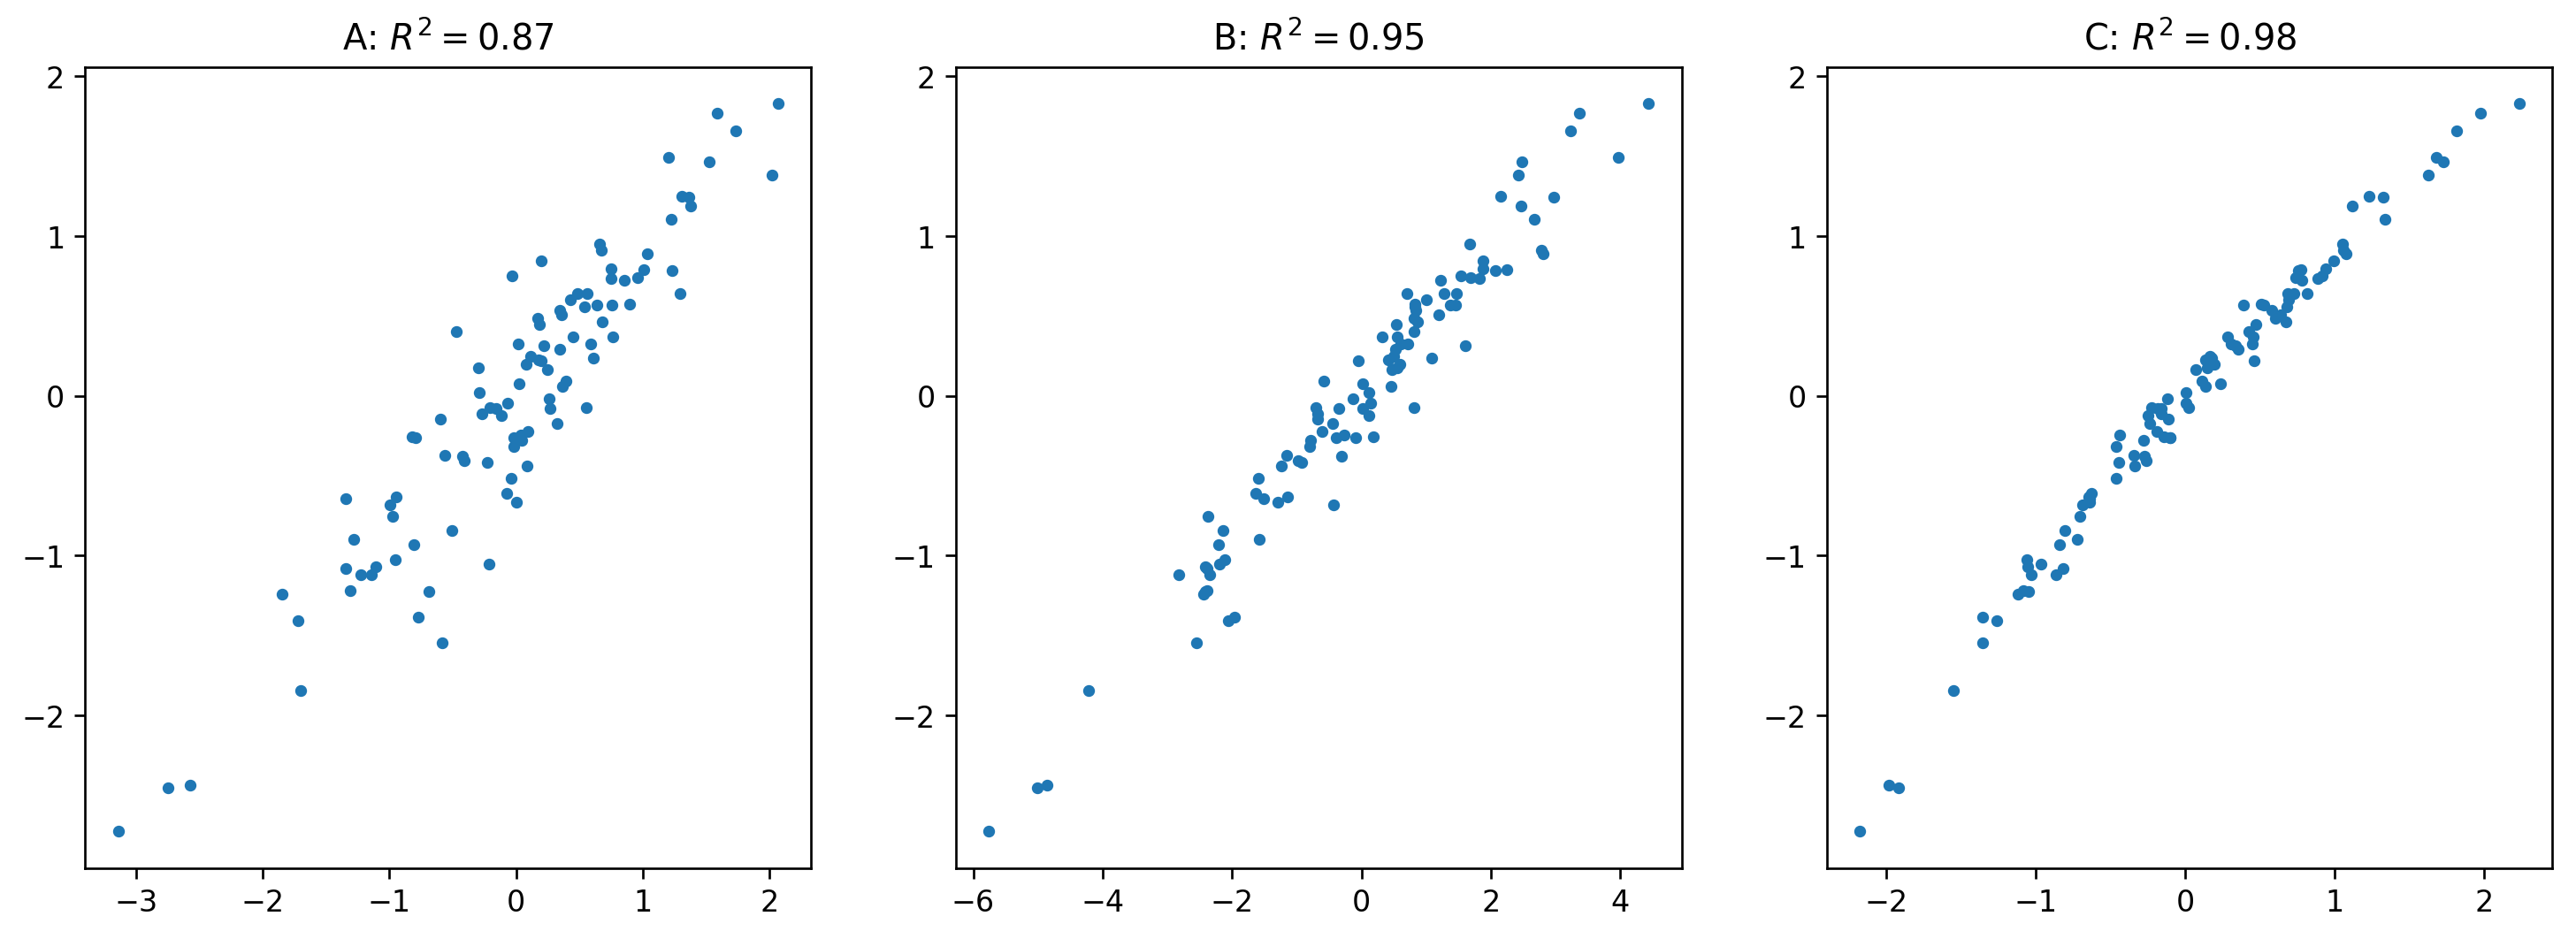

In [10]:
fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(15, 5), dpi=240)
axes[0].plot(pred1, obs, '.'); axes[0].set_title(f'A: $R^2={np.corrcoef(pred1, obs)[0, 1] ** 2: .2f}$')
axes[1].plot(pred2, obs, '.'); axes[1].set_title(f'B: $R^2={np.corrcoef(pred2, obs)[0, 1] ** 2: .2f}$')
axes[2].plot(pred3, obs, '.'); axes[2].set_title(f'C: $R^2={np.corrcoef(pred3, obs)[0, 1] ** 2: .2f}$');

Hidden assumption:
* Predicted vs. observed (PO):  $\hat{y} = a_1  y + b_1 + \epsilon$

**OR**

* Observed vs. predicted (OP): $y = a_2  \hat{y}  + b_2 + \epsilon$

Ideally: $b_1, b_2 = 0.0$, $a_1, a_2 = 1$

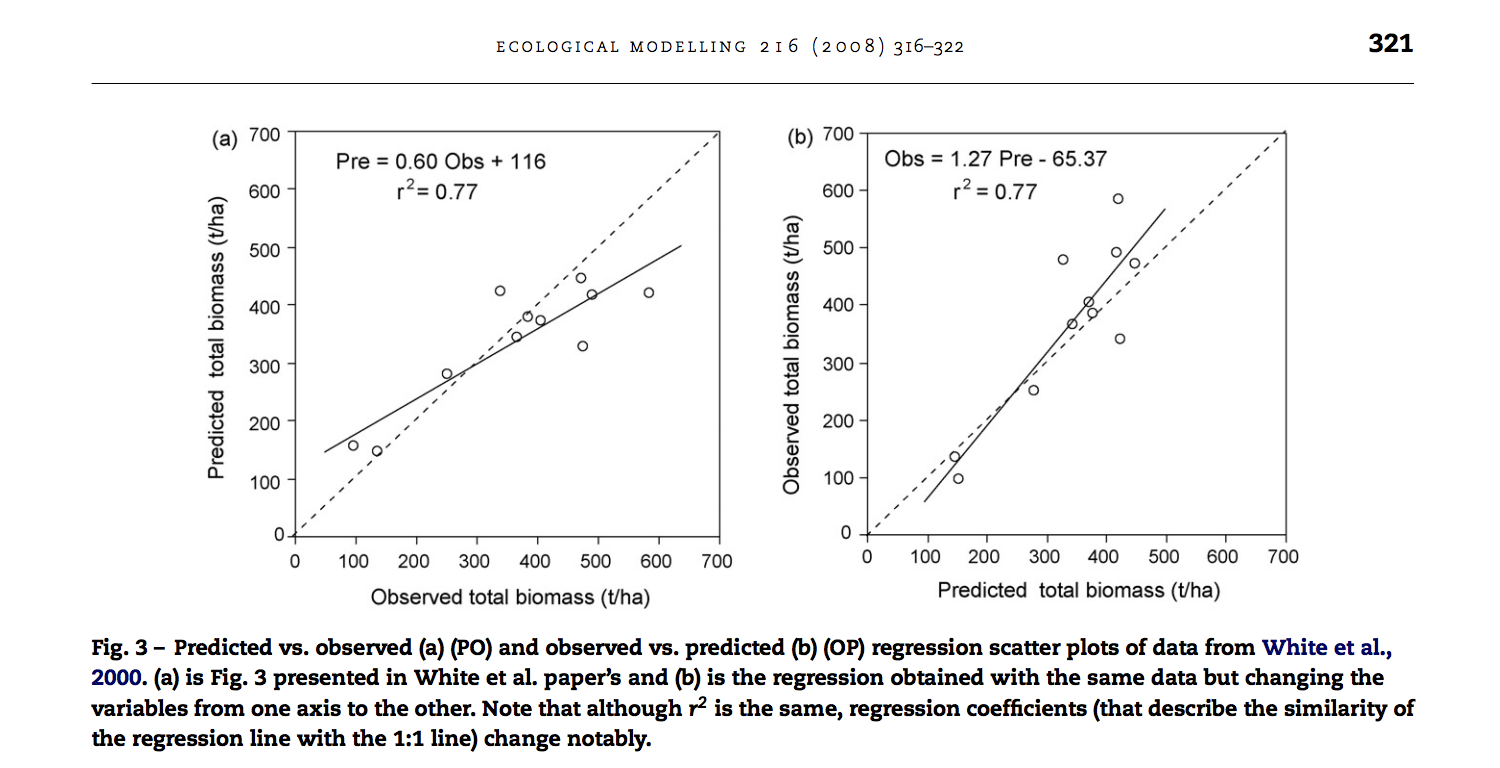

In [11]:
Image('figures/panero_fig3.png')

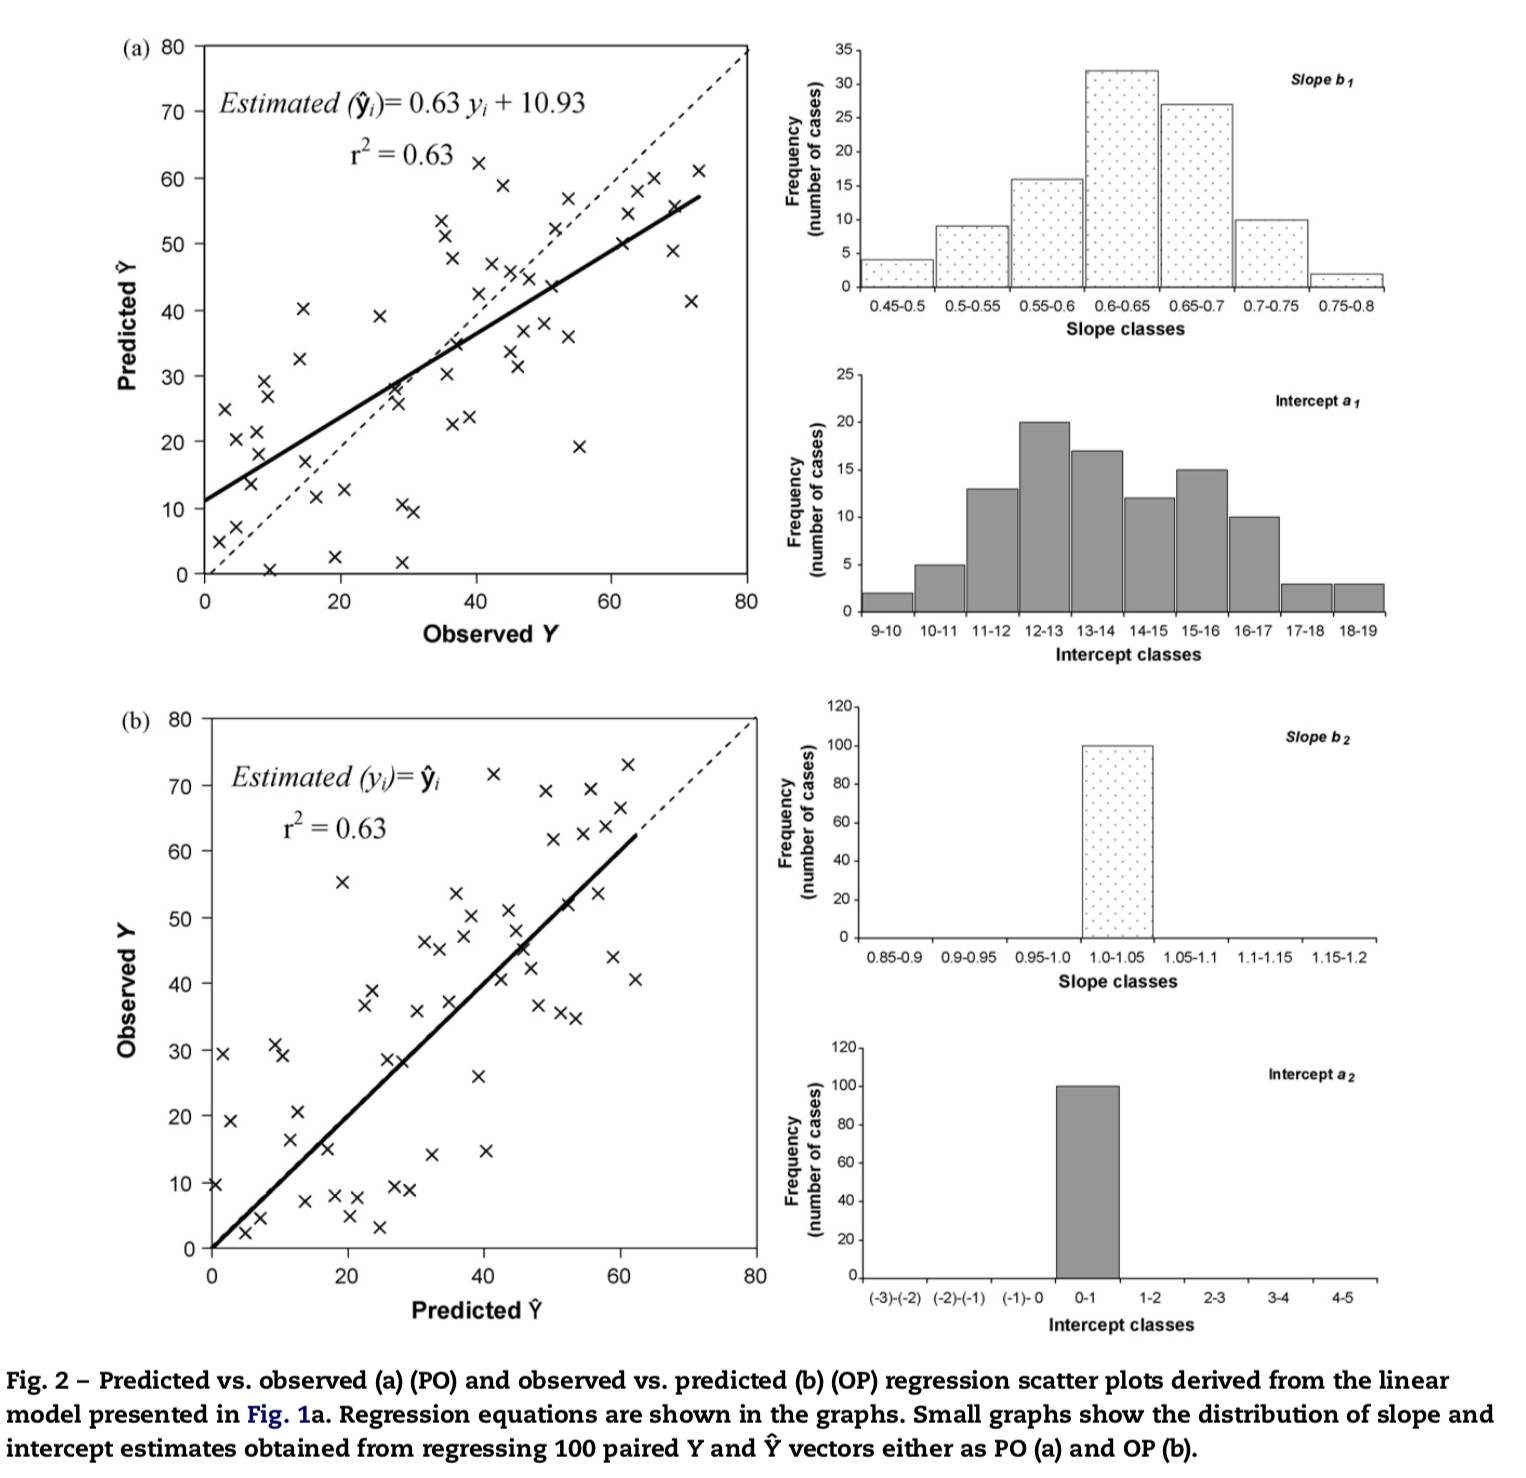

In [12]:
Image('figures/panero_fig2.png')

> spurious effect is added to the regression parameters when regressing PO values and comparing them against the 1:1 line. Observed (in the y-axis) vs. predicted (in the x-axis) (OP) regressions should be used instead. 

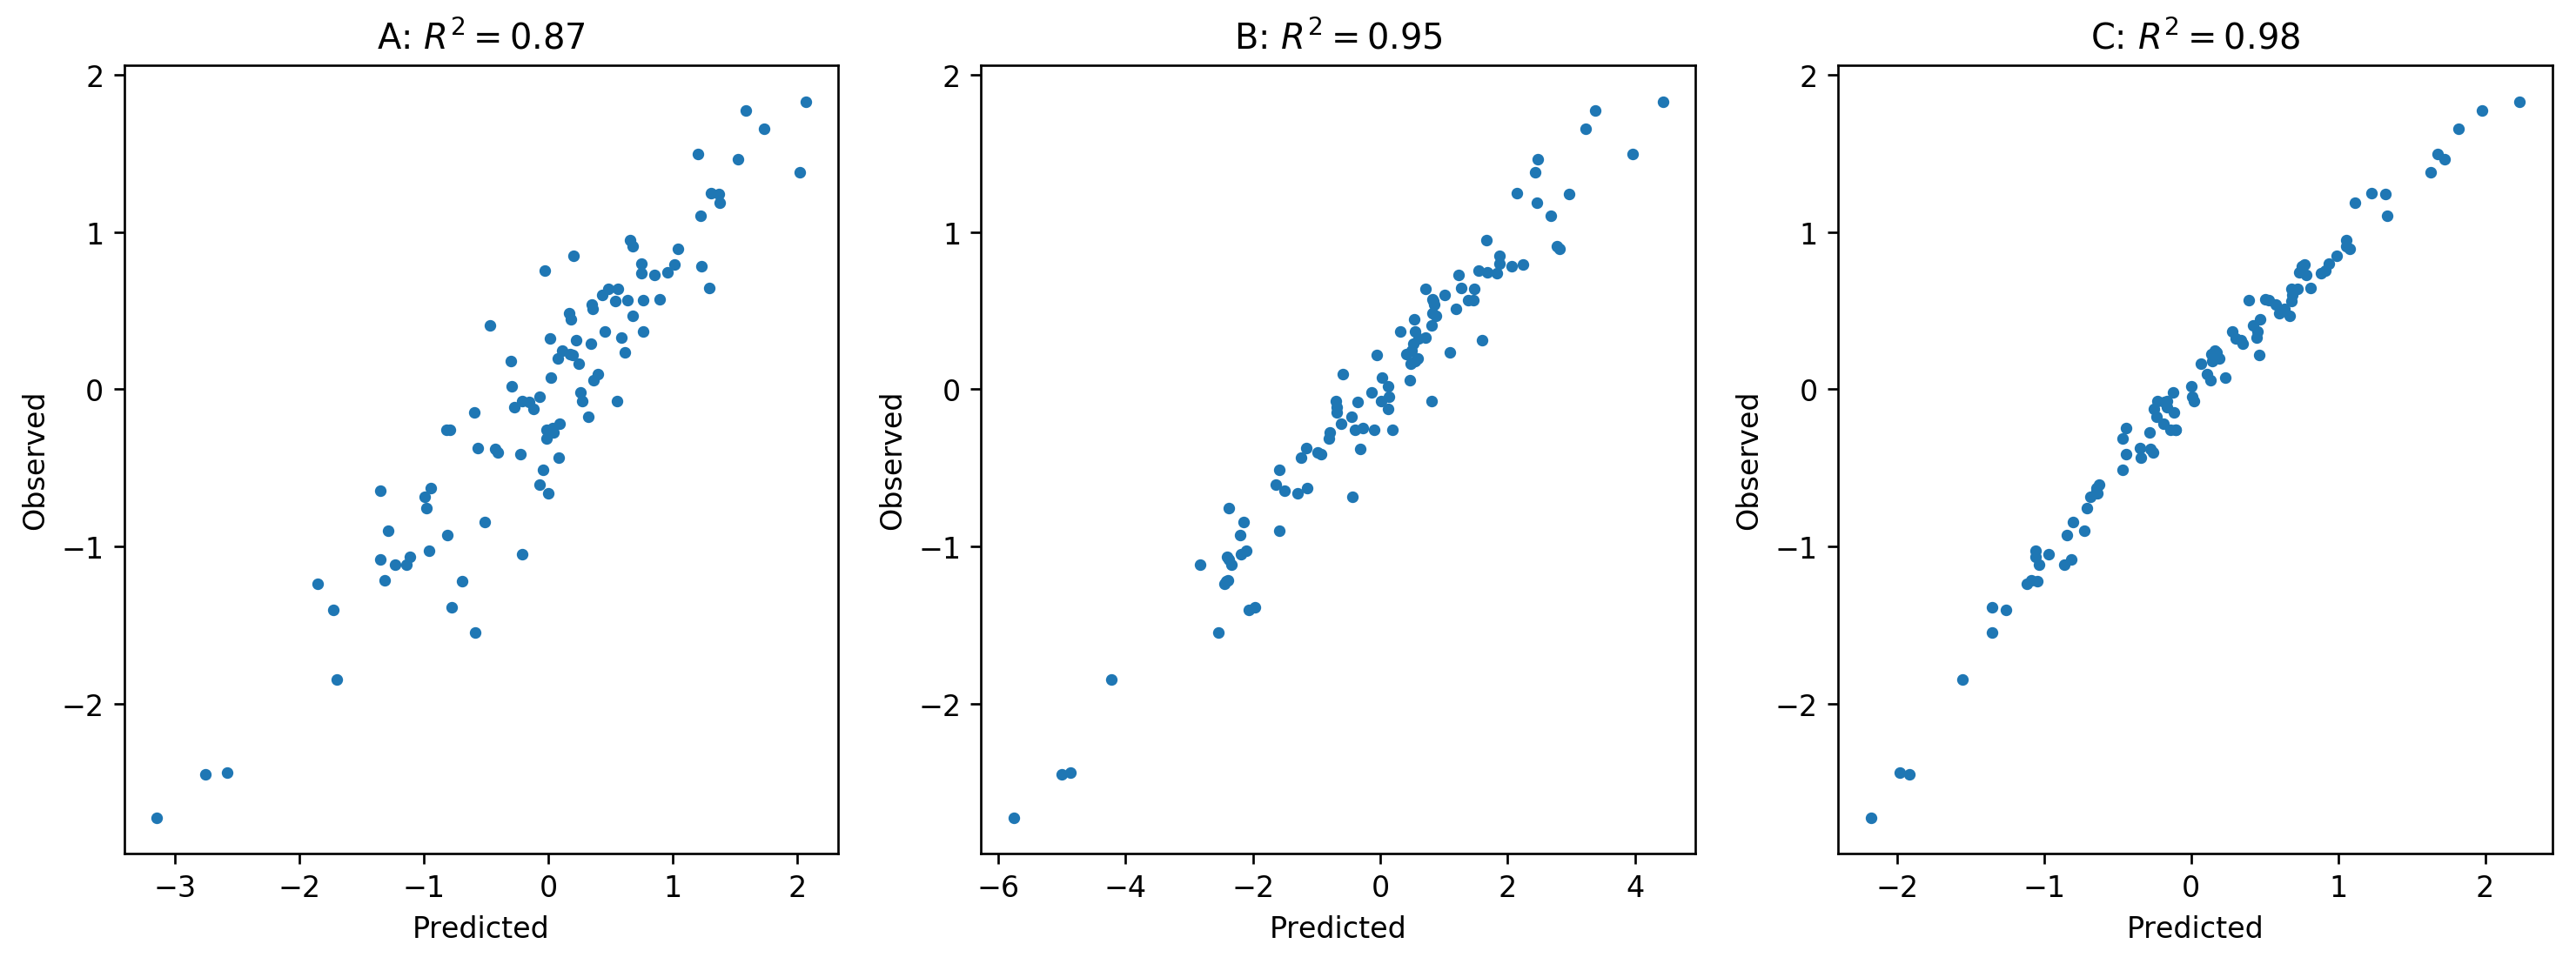

In [13]:
fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(15, 5), dpi=240)
axes[0].plot(pred1, obs, '.'); axes[0].set_title(f'A: $R^2={np.corrcoef(pred1, obs)[0, 1] ** 2: .2f}$')
axes[1].plot(pred2, obs, '.'); axes[1].set_title(f'B: $R^2={np.corrcoef(pred2, obs)[0, 1] ** 2: .2f}$')
axes[2].plot(pred3, obs, '.'); axes[2].set_title(f'C: $R^2={np.corrcoef(pred3, obs)[0, 1] ** 2: .2f}$')
for ax in axes:
    ax.set_xlabel('Predicted');ax.set_ylabel('Observed')
None

## A better OP plot

In [14]:
def plot_observed_vs_predicted(observations, predictions, ax=None):
    if ax is None:
        fig, ax = plt.subplots()
    sns.regplot(predictions, observations, ax=ax, ci=99, color='C0')
    ax.set_ylabel('Observed quality')
    ax.set_xlabel('Predicted quality')
    return ax

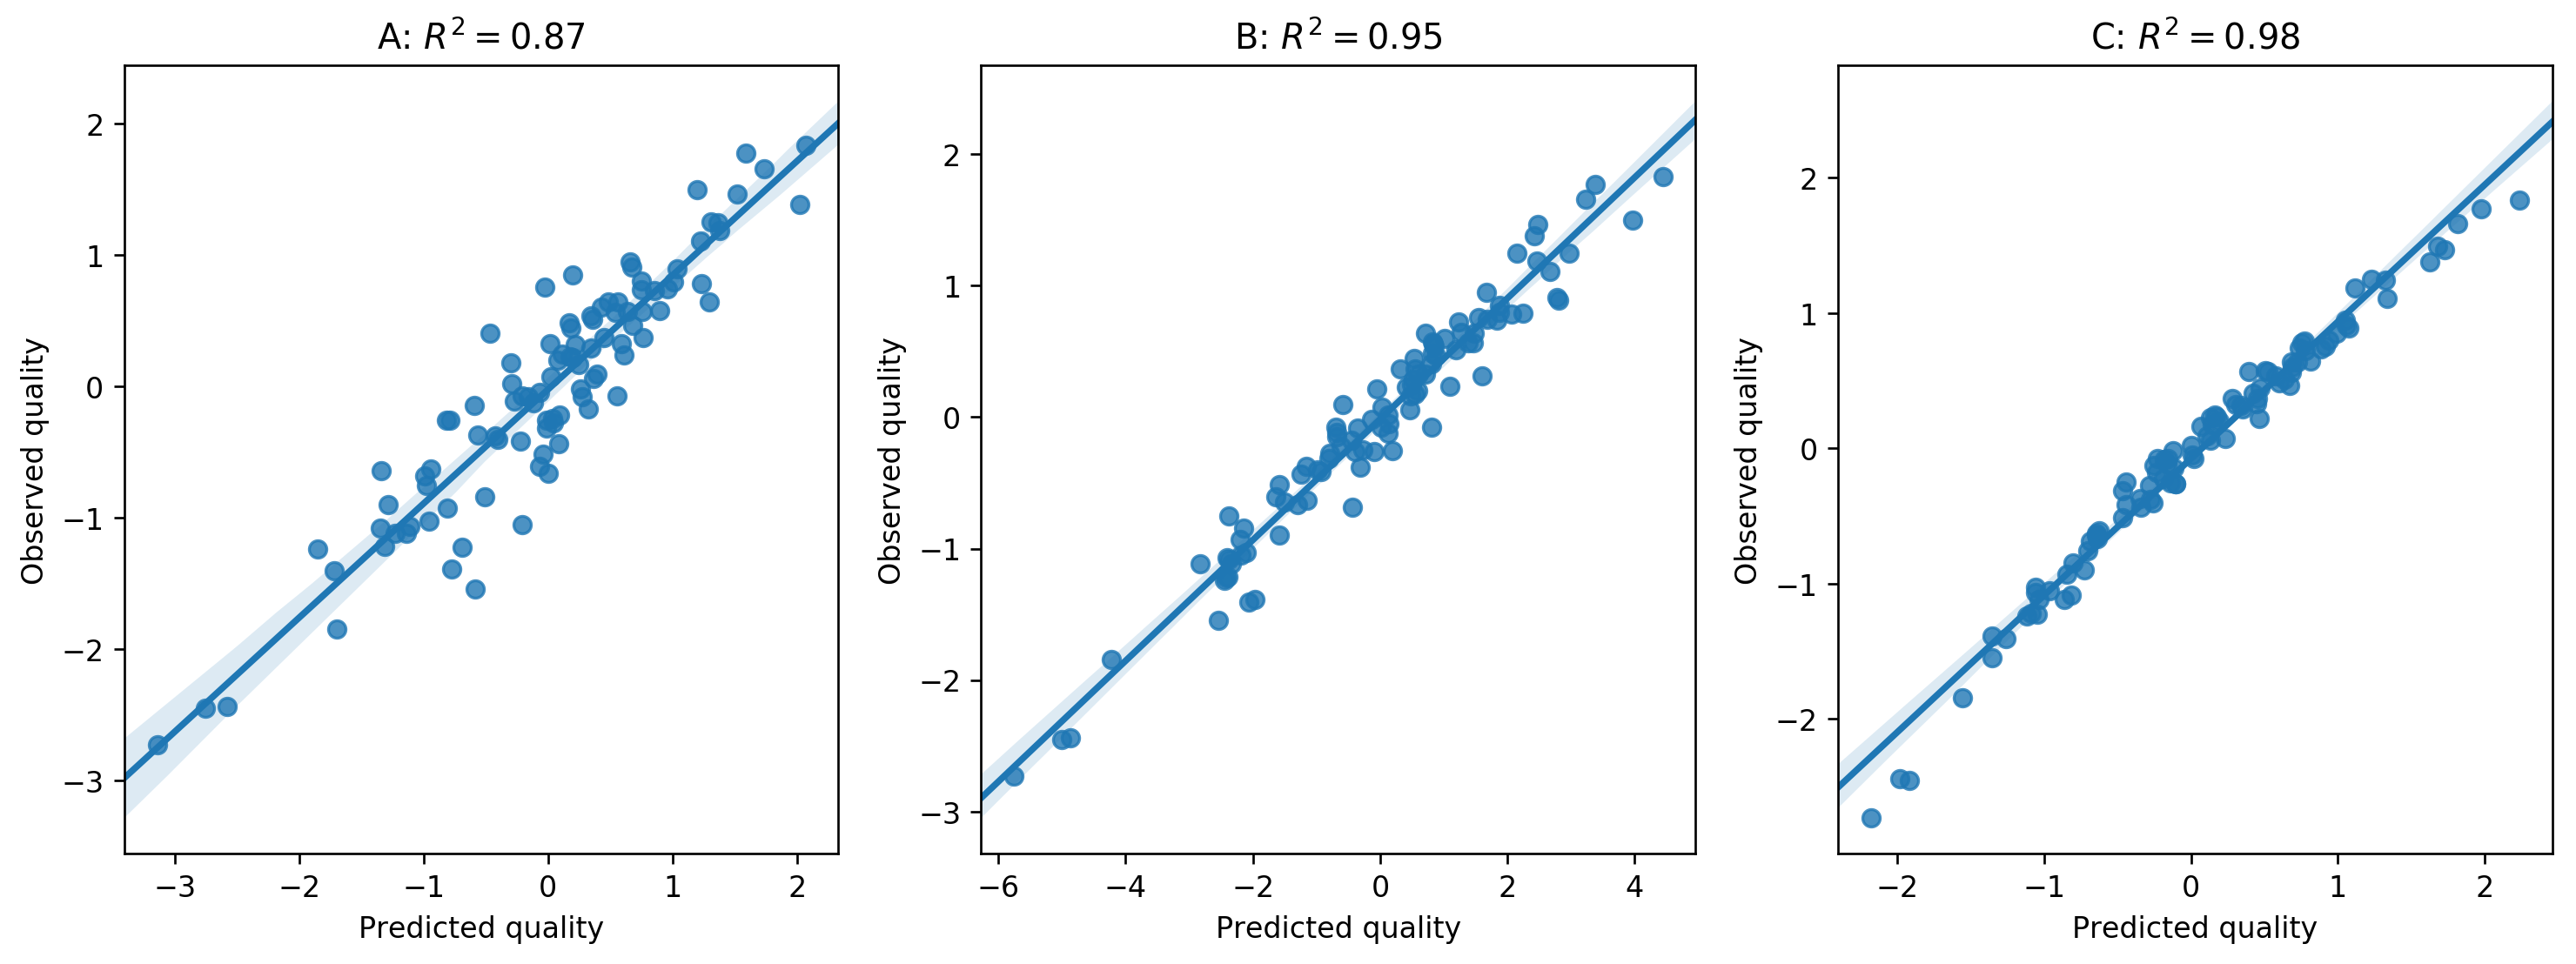

In [16]:
fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(15, 5), dpi=240)
plot_observed_vs_predicted(obs, pred1, axes[0]); axes[0].set_title(f'A: $R^2={np.corrcoef(pred1, obs)[0, 1] ** 2: .2f}$')
plot_observed_vs_predicted(obs, pred2, axes[1]); axes[1].set_title(f'B: $R^2={np.corrcoef(pred2, obs)[0, 1] ** 2: .2f}$')
plot_observed_vs_predicted(obs, pred3, axes[2]); axes[2].set_title(f'C: $R^2={np.corrcoef(pred3, obs)[0, 1] ** 2: .2f}$')
None

**What is the slope of this regression line?**

$y = a_2  \hat{y}  + b_2 + \epsilon$

Is $a_2 = 1$?

 * The X- and Y- axes represent the same variable at the same scale.
 * A given horizontal distance on a graph should correspond to the same vertical distance in on the graph **and** in the data

In [18]:
def plot_observed_vs_predicted(observations, predictions, ax=None, ylabel=True):
    if ax is None:
        fig, ax = plt.subplots()
    sns.regplot(predictions, observations, ax=ax, ci=99, color='C0')
    mn = min((min(observations), min(predictions)))
    mx = max((max(observations), max(predictions)))
    
    # Equal aspect ratio
    ax.set_aspect(1.0)
    # Identity line for better visual aid
    ax.plot([mn, mx], [mn, mx], '--', color='k', zorder=-1)
    # Equal axis limits
    ax.set_xlim(mn, mx); ax.set_ylim(mn, mx)
    sns.despine(ax=ax)
    ax.set_xlabel('Predicted')
    if ylabel:
        ax.set_ylabel('Observed', rotation=0, y=1, va='top', ha='right')
    return ax

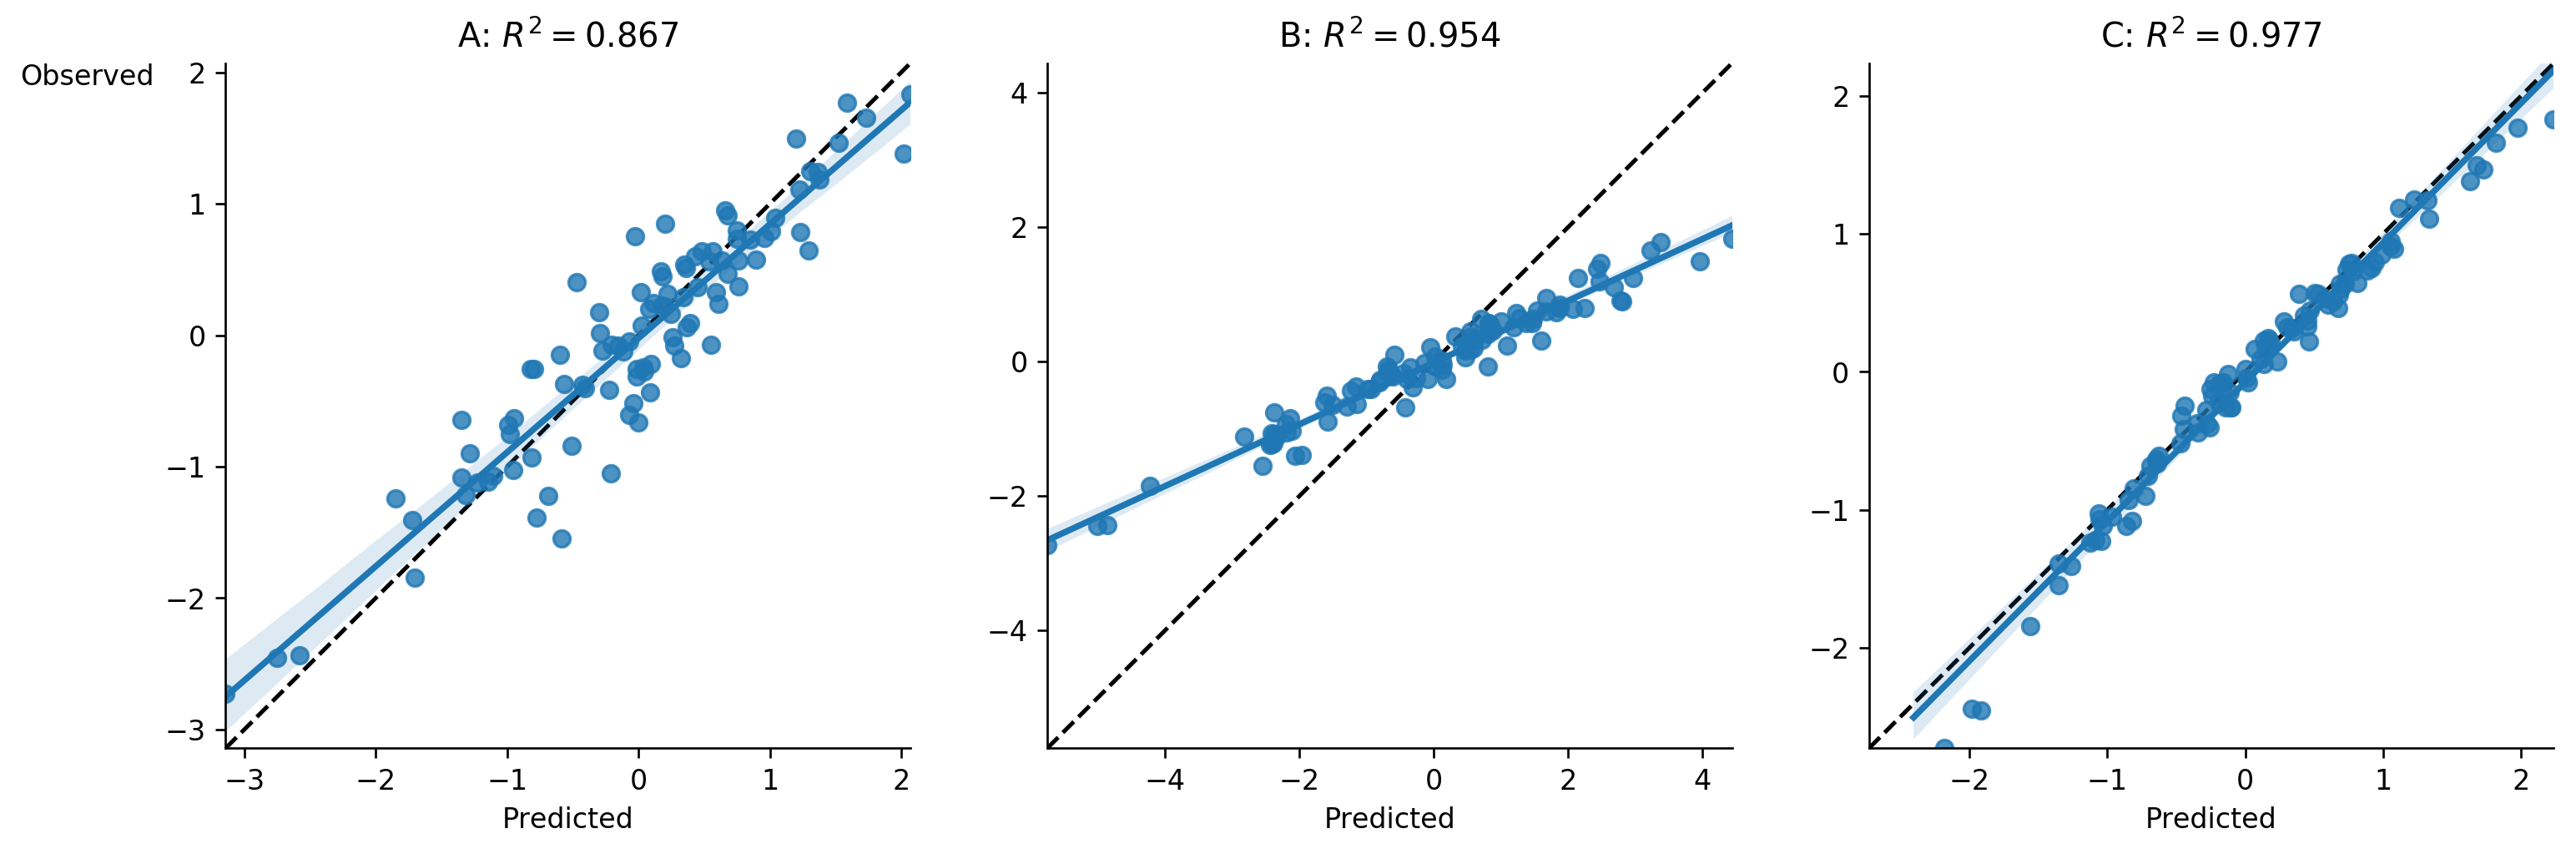

In [19]:
fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(15, 5), dpi=240)
plot_observed_vs_predicted(obs, pred1, axes[0]); axes[0].set_title(f'A: $R^2={np.corrcoef(pred1, obs)[0, 1] ** 2: .3f}$')
plot_observed_vs_predicted(obs, pred2, axes[1], ylabel=False); axes[1].set_title(f'B: $R^2={np.corrcoef(pred2, obs)[0, 1] ** 2: .3f}$')
plot_observed_vs_predicted(obs, pred3, axes[2], ylabel=False); axes[2].set_title(f'C: $R^2={np.corrcoef(pred3, obs)[0, 1] ** 2: .3f}$')
None

**Recall the residuals**

$y = a_2  \hat{y}  + b_2 + \epsilon$

In [20]:
def plot_residuals(observations, predictions, ax=None, ylabel=True):
    if ax is None:
        fig, ax = plt.subplots()
    residuals =  observations - predictions
    ax.plot(predictions, residuals, 'o', color='C0')
    sns.despine(ax=ax)
    ax.axhline(0, color='k', zorder=-1, ls='--')
    ax.set_xlabel('Predicted quality', y=-1)
    if ylabel:
        ax.set_ylabel('Obs $-$ Pred', rotation=0, y=1, va='top', ha='right')
    ax.text(x=ax.get_xlim()[1], y=ax.get_ylim()[1], s='Overestimation', color='gray', size='small', ha='right', va='top')
    ax.text(x=ax.get_xlim()[1], y=ax.get_ylim()[0], s='Underestimation', color='gray', size='small', ha='right', va='bottom')
    return ax


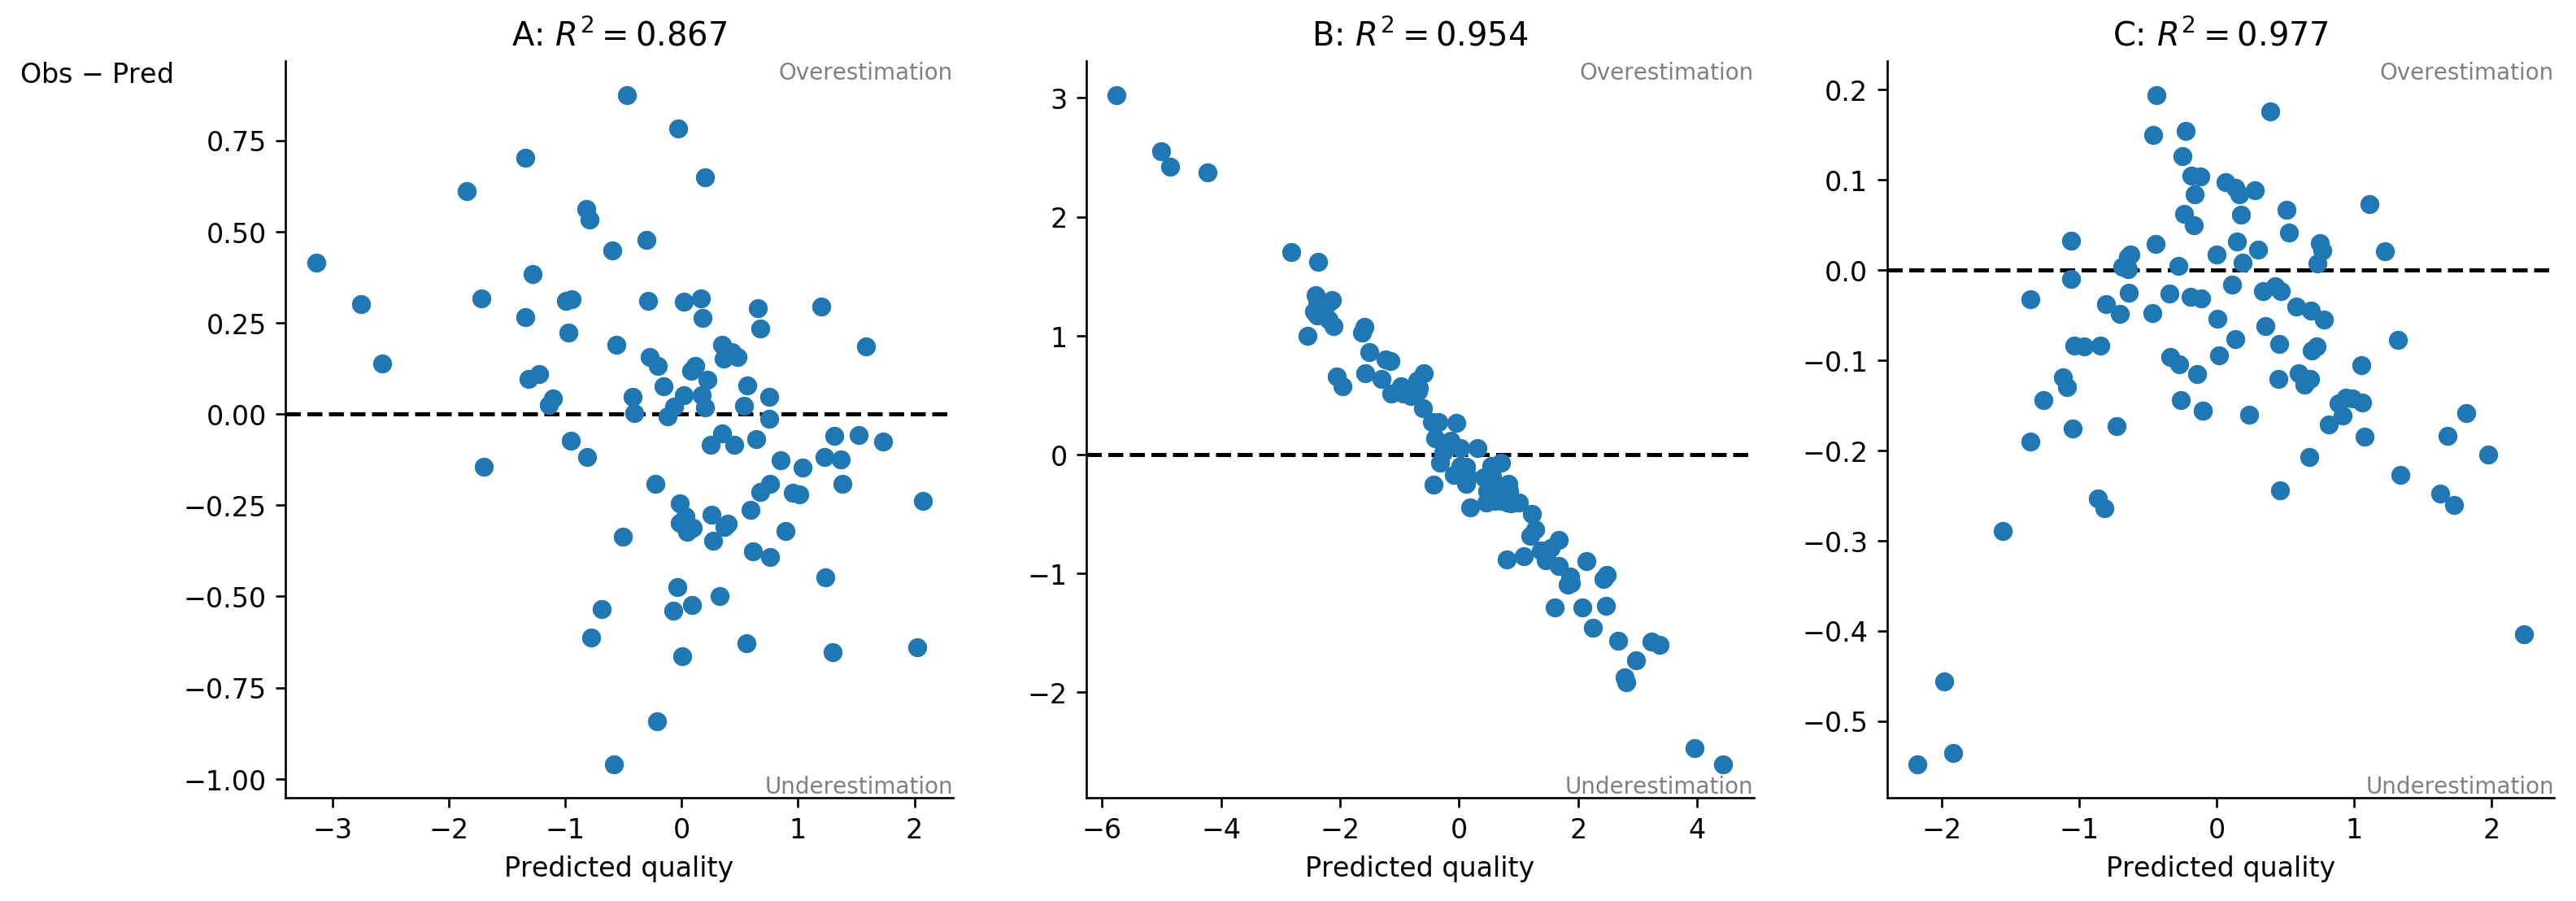

In [21]:
fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(15, 5), dpi=240)
plot_residuals(obs, pred1, axes[0]); axes[0].set_title(f'A: $R^2={np.corrcoef(pred1, obs)[0, 1] ** 2: .3f}$')
plot_residuals(obs, pred2, axes[1], ylabel=False); axes[1].set_title(f'B: $R^2={np.corrcoef(pred2, obs)[0, 1] ** 2: .3f}$')
plot_residuals(obs, pred3, axes[2], ylabel=False); axes[2].set_title(f'C: $R^2={np.corrcoef(pred3, obs)[0, 1] ** 2: .3f}$')
None

## Combining the components

In [24]:
def combined_plot(observations, predictions, fig=None):
    if fig is None:
        fig = plt.figure(figsize=(6, 6+3))
    ax_obs_pred = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
    ax_residuals = plt.subplot2grid((3, 1), (2, 0), sharex=ax_obs_pred)
    plot_observed_vs_predicted(observations, predictions, ax=ax_obs_pred)
    plot_residuals(observations, predictions, ax=ax_residuals)
    fig.tight_layout()
    return fig

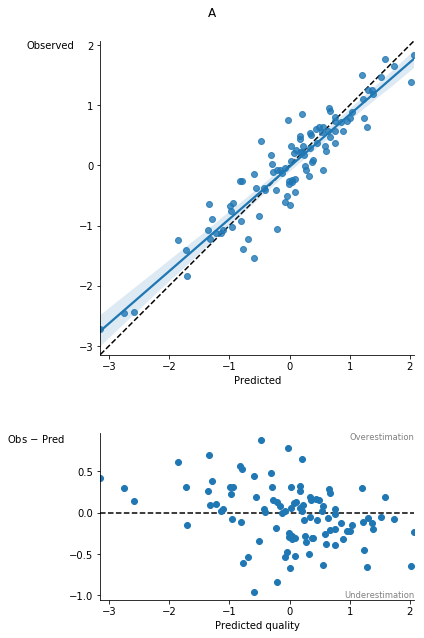

In [25]:
fig = combined_plot(obs, pred1)
fig.suptitle('A');

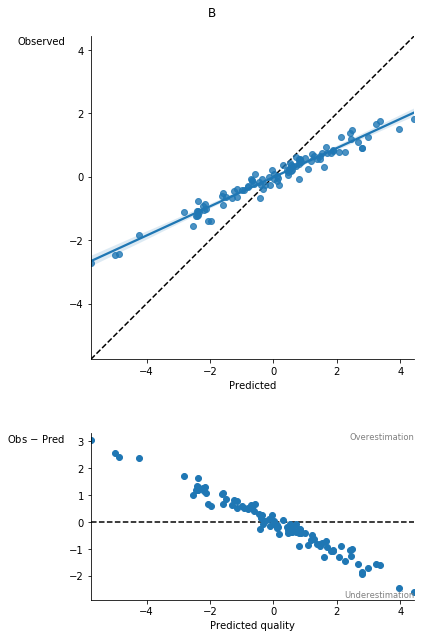

In [26]:
fig = combined_plot(obs, pred2)
fig.suptitle('B');

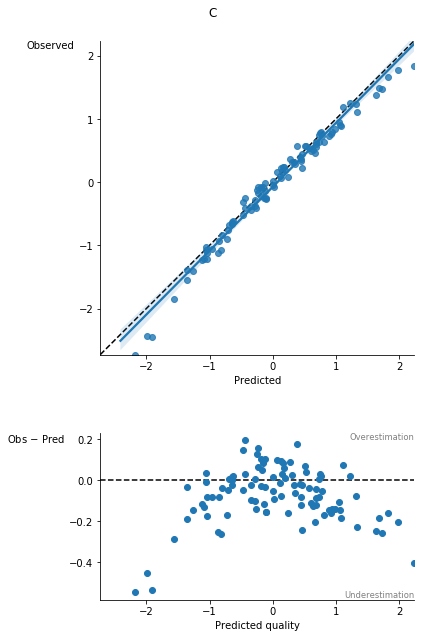

In [27]:
fig = combined_plot(obs, pred3)
fig.suptitle('C');

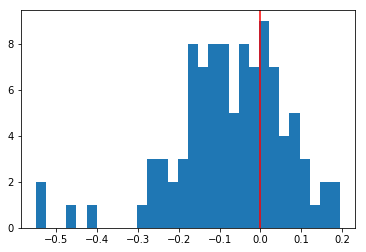

In [31]:
plt.hist(obs - pred3, bins=30)
plt.axvline(0, color='red')
None